In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from scipy.stats import norm
import matplotlib.mlab as mlab
import math

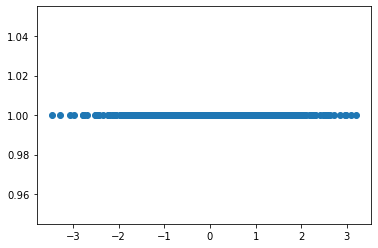

In [2]:
X = np.random.normal(size=(1000,1))
plt.scatter(X,[1 for x in X])

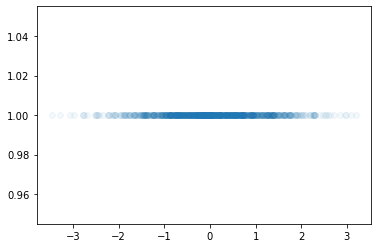

In [3]:
plt.scatter(X,[1 for x in X], alpha=0.05)

(array([  4.,  16.,  50., 134., 227., 257., 173., 100.,  30.,   9.]),
 array([-3.46755543, -2.80041924, -2.13328305, -1.46614687, -0.79901068,
        -0.13187449,  0.5352617 ,  1.20239788,  1.86953407,  2.53667026,
         3.20380645]),
 <BarContainer object of 10 artists>)

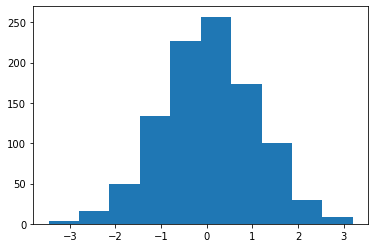

In [4]:
plt.hist(X)

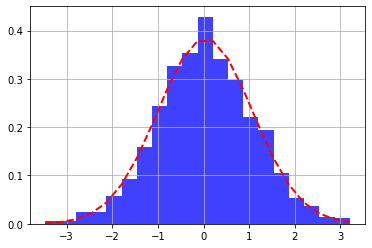

In [5]:
# best fit of data
(mu, sigma) = norm.fit(X)

# the histogram of the data
n, bins, patches = plt.hist(X, 20, density = True, facecolor='blue', alpha=0.75)

# add a 'best fit' line
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.grid(True)

plt.show()

In [6]:
X = np.random.normal(size=(1000,2))

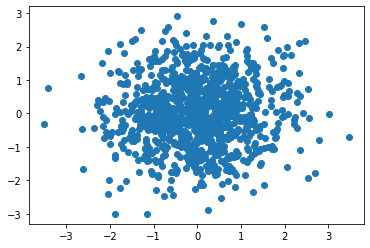

In [7]:
plt.scatter(X[:,0], X[:,1])

(array([[ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  1.,  4.,  5.,  1.,  1.,  0.,  0.],
        [ 1.,  4.,  2., 12., 13., 12.,  5.,  5.,  5.,  0.],
        [ 2.,  3., 15., 23., 50., 48., 19., 17.,  3.,  2.],
        [ 1.,  3., 16., 33., 46., 63., 40., 18., 14.,  3.],
        [ 2.,  6., 26., 41., 58., 53., 49., 25.,  7.,  1.],
        [ 0.,  5., 15., 16., 42., 31., 27., 19.,  6.,  1.],
        [ 0.,  1.,  3., 11.,  9.,  8., 12.,  5.,  4.,  1.],
        [ 0.,  1.,  1.,  1.,  5.,  4.,  4.,  1.,  3.,  0.],
        [ 0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.]]),
 array([-3.50112341, -2.80490133, -2.10867926, -1.41245719, -0.71623511,
        -0.02001304,  0.67620903,  1.37243111,  2.06865318,  2.76487525,
         3.46109733]),
 array([-3.00723795, -2.41584612, -1.82445429, -1.23306247, -0.64167064,
        -0.05027881,  0.54111302,  1.13250484,  1.72389667,  2.3152885 ,
         2.90668033]),
 <matplotlib.collections.QuadMesh at 0x2a9398e24f0>)

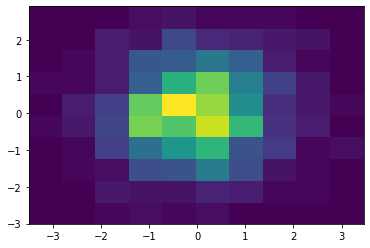

In [8]:
plt.hist2d(X[:,0], X[:,1])

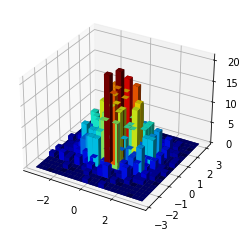

In [9]:

x = X[:,0]
y = X[:,1]

fig = plt.figure()          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

#make histogram stuff - set bins - I choose 20x20 because I have a lot of data
hist, xedges, yedges = np.histogram2d(x, y, bins=(20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')

plt.show()

# High dimension

In [10]:
def normalized(a, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)

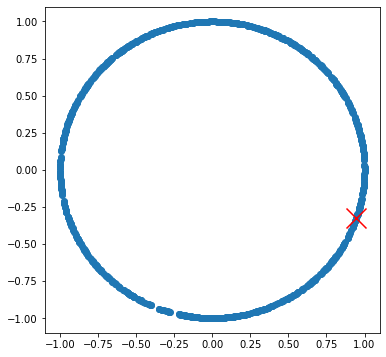

In [11]:
d = 2
X = np.random.normal(size=(1000,d))
X = normalized(X)
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[0,0], X[0,1], c=['r'],s=[400], marker='x')


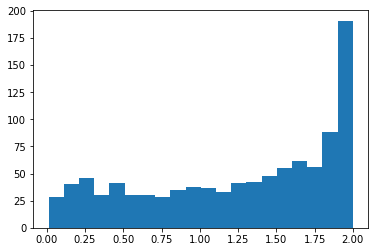

In [18]:
d = 2
n = 1000
X = np.random.normal(size=(n,d))
X = normalized(X)
inner = X[0,:].dot(X.transpose())
d = [np.sqrt(2 - 2 * inner[i] ) for i in range(1,n)]
p = plt.hist(d, bins=20)

In [ ]:
d = 20000
X = np.random.normal(size=(1000,d))
X = normalized(X)
plt.hist(X[:,0])
